In [5]:
%pylab inline
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/Users/vinguyen/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data Exploration

In [8]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,9139-TWBAS,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


I will check if there is any null value in this dataframe.

In [10]:

df.isnull().values.any()

False

In [11]:
#7043 rows of data
df.shape[0]

7043

In [12]:
#21 columns/variables
df.shape[1]

21

In [13]:
boolean = df['customerID'].duplicated().any()
boolean

False

Dropping cutomerID because it does not provide value before I can build my model.

In [14]:
df = df.drop(columns ='customerID', axis= 1)

In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Let's separate the target attribute and the attributes used for model training¶


In [16]:
# separating my target variable

#target
y = df['Churn']
#df without target
df = df[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']]

df.describe().T


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


Creating dummy variables

In [17]:
df_ssf = pd.get_dummies(df)
df_ssf.head(10)

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,8,99.65,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,22,89.10,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,10,29.75,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,28,104.80,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,62,56.15,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_names = df_ssf.columns.values
df_names

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', ...,
       'TotalCharges_999.45', 'TotalCharges_999.8', 'TotalCharges_999.9'],
      dtype=object)

In [19]:
X = df_ssf[df_names[1:]]



Build the training and testing dataset


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

A versatile function to measure performance of a model


In [21]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")

First I will build a simple decision tree then I will compare performance of standard decision tree classifier against some ensemble methods: Random Forest Classifier and Ada Boost.

In [22]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='gini')
dt = dt.fit(X_train, y_train)

In [23]:
from sklearn import metrics
measure_performance(X_test, y_test, dt, show_confussion_matrix=False, show_classification_report=False)
#unlimted max depth 

Accuracy:0.773 



In [26]:
from sklearn import metrics
measure_performance(X_test, y_test, dt, show_confussion_matrix=True, show_classification_report=True)
#unlimted max depth 

Accuracy:0.770 

Classification report
              precision    recall  f1-score   support

          No       0.83      0.86      0.85      1026
         Yes       0.59      0.52      0.55       383

    accuracy                           0.77      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.76      0.77      0.77      1409
 

Confusion matrix
[[886 140]
 [184 199]] 



[Text(99.69585322390375, 214.5016216216216, 'X[34] <= 0.5\ngini = 0.388\nsamples = 5634\nvalue = [4148, 1486]'),
 Text(25.334922617097938, 208.62486486486486, 'X[14] <= 0.5\ngini = 0.122\nsamples = 2544\nvalue = [2378, 166]'),
 Text(18.825417622011138, 202.7481081081081, 'X[36] <= 0.5\ngini = 0.06\nsamples = 1774\nvalue = [1719, 55]'),
 Text(14.256141500163775, 196.87135135135134, 'X[33] <= 0.5\ngini = 0.11\nsamples = 751\nvalue = [707, 44]'),
 Text(11.112479528332788, 190.9945945945946, 'X[876] <= 0.5\ngini = 0.064\nsamples = 541\nvalue = [523, 18]'),
 Text(10.527612184736325, 185.11783783783784, 'X[5395] <= 0.5\ngini = 0.061\nsamples = 540\nvalue = [523, 17]'),
 Text(9.942744841139863, 179.24108108108106, 'X[86] <= 0.5\ngini = 0.058\nsamples = 539\nvalue = [523, 16]'),
 Text(9.3578774975434, 173.36432432432431, 'X[1023] <= 0.5\ngini = 0.054\nsamples = 538\nvalue = [523, 15]'),
 Text(8.773010153946938, 167.48756756756757, 'X[2469] <= 0.5\ngini = 0.051\nsamples = 537\nvalue = [523, 14]

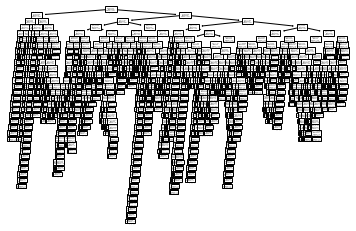

In [25]:
tree.plot_tree(dt.fit(X_train, y_train))



[Text(558.0, 978.48, 'X[34] <= 0.5\ngini = 0.388\nsamples = 5634\nvalue = [4148, 1486]'),
 Text(279.0, 761.0400000000001, 'X[14] <= 0.5\ngini = 0.122\nsamples = 2544\nvalue = [2378, 166]'),
 Text(139.5, 543.6, 'X[35] <= 0.5\ngini = 0.06\nsamples = 1774\nvalue = [1719, 55]'),
 Text(69.75, 326.1600000000001, 'X[636] <= 0.5\ngini = 0.021\nsamples = 1023\nvalue = [1012, 11]'),
 Text(34.875, 108.72000000000003, 'gini = 0.019\nsamples = 1022\nvalue = [1012, 10]'),
 Text(104.625, 108.72000000000003, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(209.25, 326.1600000000001, 'X[33] <= 0.5\ngini = 0.11\nsamples = 751\nvalue = [707, 44]'),
 Text(174.375, 108.72000000000003, 'gini = 0.064\nsamples = 541\nvalue = [523, 18]'),
 Text(244.125, 108.72000000000003, 'gini = 0.217\nsamples = 210\nvalue = [184, 26]'),
 Text(418.5, 543.6, 'X[35] <= 0.5\ngini = 0.247\nsamples = 770\nvalue = [659, 111]'),
 Text(348.75, 326.1600000000001, 'X[0] <= 71.5\ngini = 0.143\nsamples = 348\nvalue = [321, 27]'),
 Text

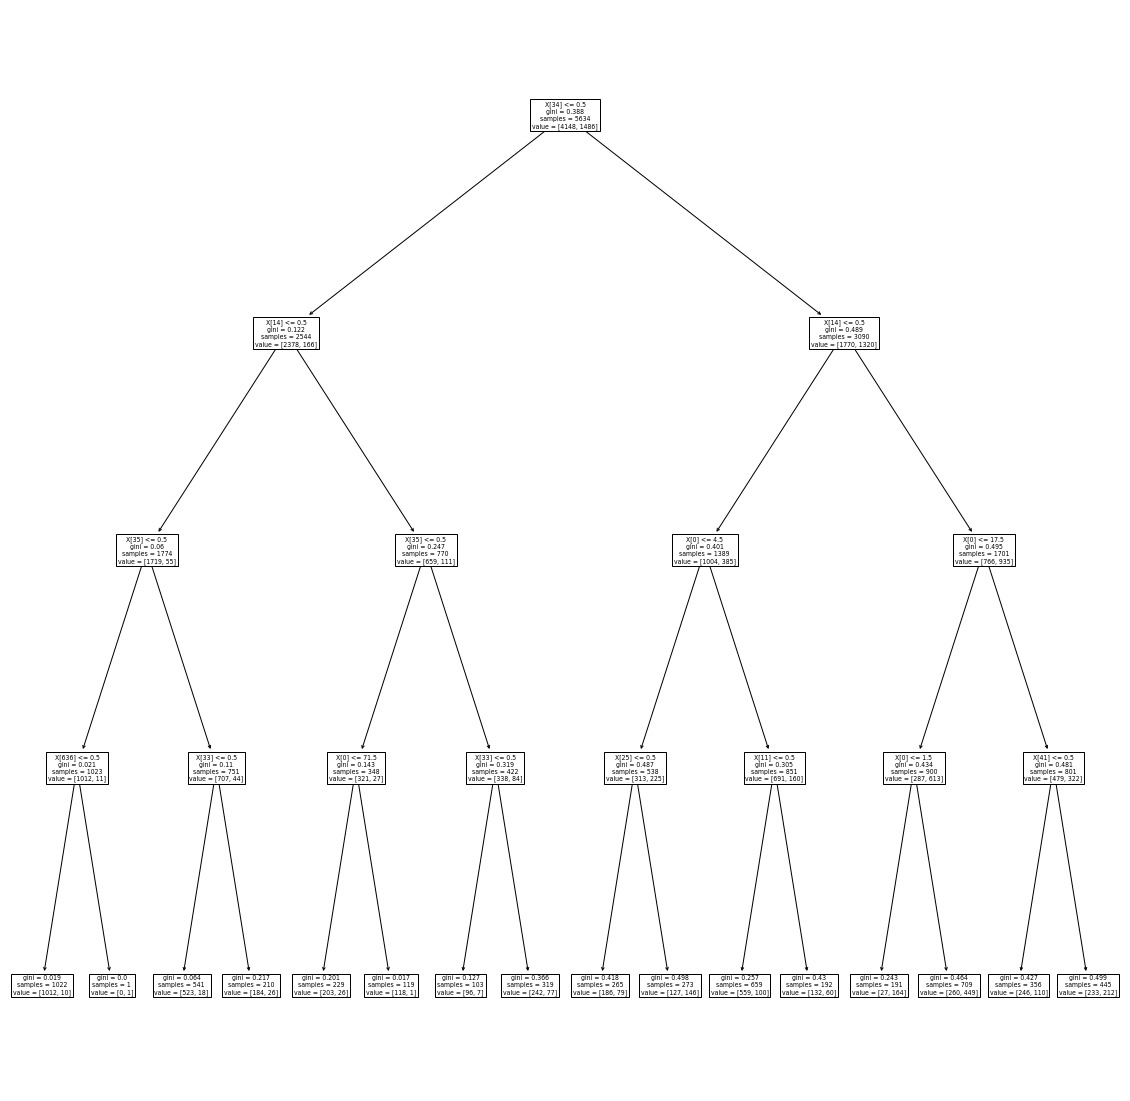

In [459]:
# I will now prune my tree to make it easier to read and visulize by limiting the max depth of the tree and possibily improve accuracy
shorterdt = tree.DecisionTreeClassifier(criterion='gini',max_depth = 4)
tree.plot_tree(shorterdt.fit(X_train, y_train))

In [460]:
measure_performance(X_test, y_test, shorterdt, show_confussion_matrix=False, show_classification_report=False)


Accuracy:0.792 



Now I will build a Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=33)
rf = rf.fit(X_train, y_train)

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)

In [28]:
measure_performance(X_test, y_test, rf, show_confussion_matrix=False, show_classification_report=False)


Accuracy:0.784 



Exploring and comparing model parameters¶


In [137]:
print(rf.get_params())


{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 33, 'verbose': 0, 'warm_start': False}


Im using the "calc_params" function to explore the impact of individual parameters using cross-validation

In [138]:
from sklearn.model_selection import KFold

def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):

        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        print(param_name, '=', param_value, "Train =", train_scores[i], "Test =", test_scores[i])
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

Now we can explore the impact of 'min_samples_leaf' more systematically¶


In [139]:
msl = range(1,6)
print(msl)

range(1, 6)


min_samples_leaf = 1 Train = 0.9817624718248593 Test = 0.7687247143818527
min_samples_leaf = 2 Train = 0.7362443199369058 Test = 0.7362456481550067
min_samples_leaf = 3 Train = 0.7362443199369058 Test = 0.7362456481550067
min_samples_leaf = 4 Train = 0.7362443199369058 Test = 0.7362456481550067
min_samples_leaf = 5 Train = 0.7362443199369058 Test = 0.7362456481550067


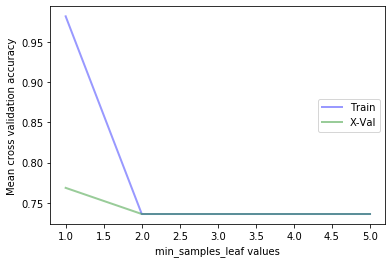

In [140]:
rf = RandomForestClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(X_train, y_train, rf, msl, 'min_samples_leaf', 5)

min_sample_leaf = 1 is the best due t having the highest accuracy

max_depth = 1 Train = 0.7362443199369058 Test = 0.7362456481550067
max_depth = 2 Train = 0.7362443199369058 Test = 0.7362456481550067
max_depth = 3 Train = 0.7362443199369058 Test = 0.7362456481550067
max_depth = 4 Train = 0.7362443199369058 Test = 0.7362456481550067
max_depth = 5 Train = 0.7362886953529254 Test = 0.7364232680484348
max_depth = 6 Train = 0.7362886855092217 Test = 0.7364232680484348
max_depth = 7 Train = 0.7366436888373779 Test = 0.7364232680484348
max_depth = 8 Train = 0.7377973905916637 Test = 0.7367781926269619


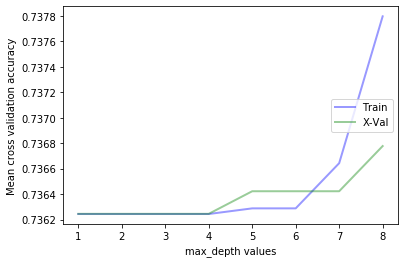

In [143]:
m_depth = [1,2,3,4,5,6, 7, 8]
rf = RandomForestClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(X_train, y_train, rf, m_depth, 'max_depth', 5)

Conclusion: a higher max_depth seems to be better so I will run it again with a bigger max depth

max_depth = 9 Train = 0.7391729891134544 Test = 0.7364231104442703
max_depth = 10 Train = 0.7413916811648015 Test = 0.7369554973120609
max_depth = 11 Train = 0.7473815256126278 Test = 0.7417485551638217
max_depth = 12 Train = 0.7610044830195127 Test = 0.751509611489974
max_depth = 13 Train = 0.7640219128718041 Test = 0.7522197758553573
max_depth = 14 Train = 0.7671278966820616 Test = 0.751155632536434
max_depth = 15 Train = 0.7775554205436914 Test = 0.7586084182688444


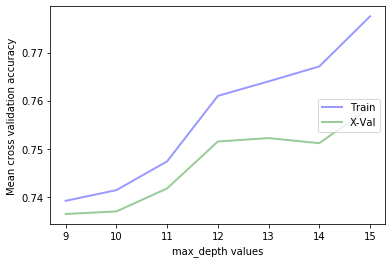

In [144]:
m_depth = [9,10,11,12,13,14,15]
rf = RandomForestClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(X_train, y_train, rf, m_depth, 'max_depth', 5)

12 for a max_depth is a good number...there are increases in accuracy as we increase max_depth so I will keep going

max_depth = 16 Train = 0.7825253588571381 Test = 0.7616276412487923
max_depth = 17 Train = 0.8012514103566393 Test = 0.7708548922696734
max_depth = 18 Train = 0.803736207248549 Test = 0.7710325121631014
max_depth = 19 Train = 0.8070193383495535 Test = 0.7717451981951171
max_depth = 20 Train = 0.816471479148378 Test = 0.7756477925172696
max_depth = 21 Train = 0.8279197852340113 Test = 0.773872223999647
max_depth = 22 Train = 0.8393680224137194 Test = 0.782925480022884


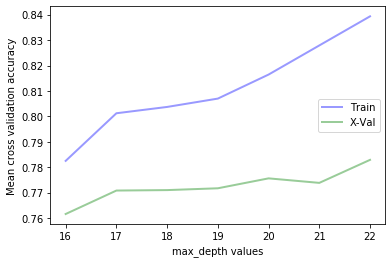

In [155]:
m_depth = [16,17,18,19,20,21,22]
rf = RandomForestClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(X_train, y_train, rf, m_depth, 'max_depth', 5)

Since accuracy kept increasing, I kept testing for optimal depth.

max_depth = 23 Train = 0.8439826424004935 Test = 0.7870064822592873
max_depth = 24 Train = 0.8592033510329686 Test = 0.7871839445485508
max_depth = 25 Train = 0.8550763782809309 Test = 0.7770674908313777
max_depth = 26 Train = 0.8745563590423965 Test = 0.7854093216559155
max_depth = 27 Train = 0.8830321225643477 Test = 0.78239088669679
max_depth = 28 Train = 0.8853830549304258 Test = 0.7823900986759673
max_depth = 29 Train = 0.9007364074694809 Test = 0.7839893081334781
max_depth = 30 Train = 0.8991834450954632 Test = 0.7820364349307566


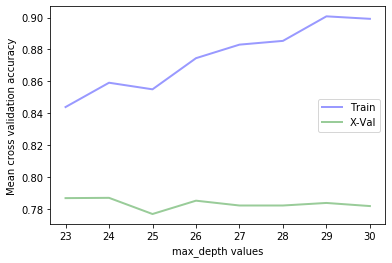

In [156]:
m_depth = [23,24,25,26,27,28,29,30]
rf = RandomForestClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(X_train, y_train, rf, m_depth, 'max_depth', 5)

max_depth = 29 was most optimal

Let's now try varying the number of estimators in the ensemble¶

In [145]:
nest = range(5, 101, 5)
print(nest)

range(5, 101, 5)


n_estimators = 5 Train = 0.9692048886194777 Test = 0.7589608211807388
n_estimators = 10 Train = 0.9817624718248593 Test = 0.7687247143818527
n_estimators = 15 Train = 0.9920571647495396 Test = 0.7729839669283421
n_estimators = 20 Train = 0.993743312433838 Test = 0.7761797065725665
n_estimators = 25 Train = 0.9960063897449082 Test = 0.7761800217808955
n_estimators = 30 Train = 0.9960063799012046 Test = 0.780084980165516
n_estimators = 35 Train = 0.9969382045753928 Test = 0.7807945141142408
n_estimators = 40 Train = 0.9970269750948392 Test = 0.7800834041238704
n_estimators = 45 Train = 0.9976038161282785 Test = 0.7786632329972687
n_estimators = 50 Train = 0.9976038259719819 Test = 0.7800838769363642
n_estimators = 55 Train = 0.9977369522200406 Test = 0.781326743377867
n_estimators = 60 Train = 0.9976038456593894 Test = 0.7820369077432502
n_estimators = 65 Train = 0.997825693208376 Test = 0.7825694522152054
n_estimators = 70 Train = 0.9977369620637443 Test = 0.7829242191895679
n_estimator

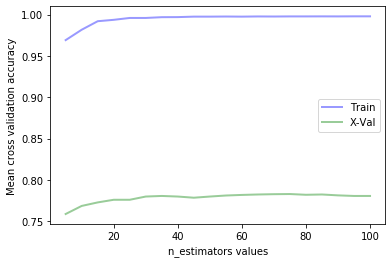

In [147]:
rf = RandomForestClassifier(n_estimators=10, random_state=33)
train_scores, test_scores = calc_params(X_train, y_train, rf, nest, 'n_estimators', 5)

n_estimators = 5 Train = 0.9692048886194777 Test = 0.7589608211807388
n_estimators = 10 Train = 0.9817624718248593 Test = 0.7687247143818527
n_estimators = 15 Train = 0.9920571647495396 Test = 0.7729839669283421
n_estimators = 20 Train = 0.993743312433838 Test = 0.7761797065725665
n_estimators = 25 Train = 0.9960063897449082 Test = 0.7761800217808955
n_estimators = 30 Train = 0.9960063799012046 Test = 0.780084980165516
n_estimators = 35 Train = 0.9969382045753928 Test = 0.7807945141142408
n_estimators = 40 Train = 0.9970269750948392 Test = 0.7800834041238704
n_estimators = 45 Train = 0.9976038161282785 Test = 0.7786632329972687
n_estimators = 50 Train = 0.9976038259719819 Test = 0.7800838769363642
n_estimators = 55 Train = 0.9977369522200406 Test = 0.781326743377867
n_estimators = 60 Train = 0.9976038456593894 Test = 0.7820369077432502
n_estimators = 65 Train = 0.997825693208376 Test = 0.7825694522152054
n_estimators = 70 Train = 0.9977369620637443 Test = 0.7829242191895679
n_estimator

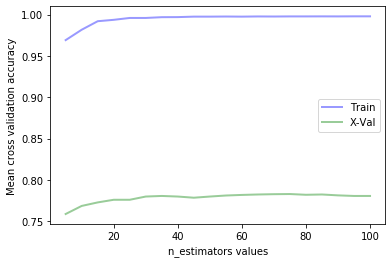

In [503]:
rf = RandomForestClassifier(n_estimators=20, random_state=33)
train_scores, test_scores = calc_params(X_train, y_train, rf, nest, 'n_estimators', 5)

I will now put together my optimal parameters to run my model
Min_leaf =1 
Max_depth = 29
number of estimators = 20

In [29]:
rf = RandomForestClassifier(n_estimators=20, min_samples_leaf=1, max_depth=29)
rf = rf.fit(X_train, y_train)

measure_performance(X_test, y_test, rf, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.793 



I can observe the importance of each feature


In [489]:
rf.feature_importances_


array([9.46327132e-02, 7.50316964e-02, 7.24038155e-03, ...,
       2.29748923e-04, 7.08266008e-05, 0.00000000e+00])

[6.89575242e-02 6.45462845e-02 1.31092089e-02 ... 1.34832775e-04
 1.52354588e-04 1.60985260e-05]


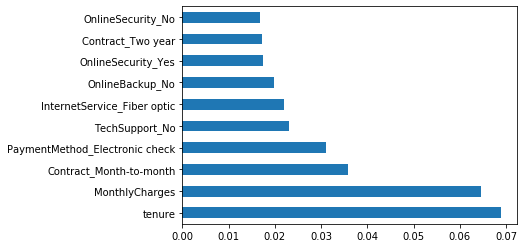

<Figure size 432x288 with 0 Axes>

In [490]:
#Graphbases on my previous random forest model
import pandas as pd
import numpy as np
data = df
X  #independent columns
y    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
rf = ExtraTreesClassifier()
rf = rf.fit(X_train, y_train)
print(rf.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
savefig('afeatures.png')


In [ ]:
Top Features: Tenure, monthly charges,monthly contract

In [207]:
rf.estimators_[:3]


[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=29,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1764612230, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=29,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=403890105, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=29,
                        max_features='auto', max_leaf_nodes=None,
                        

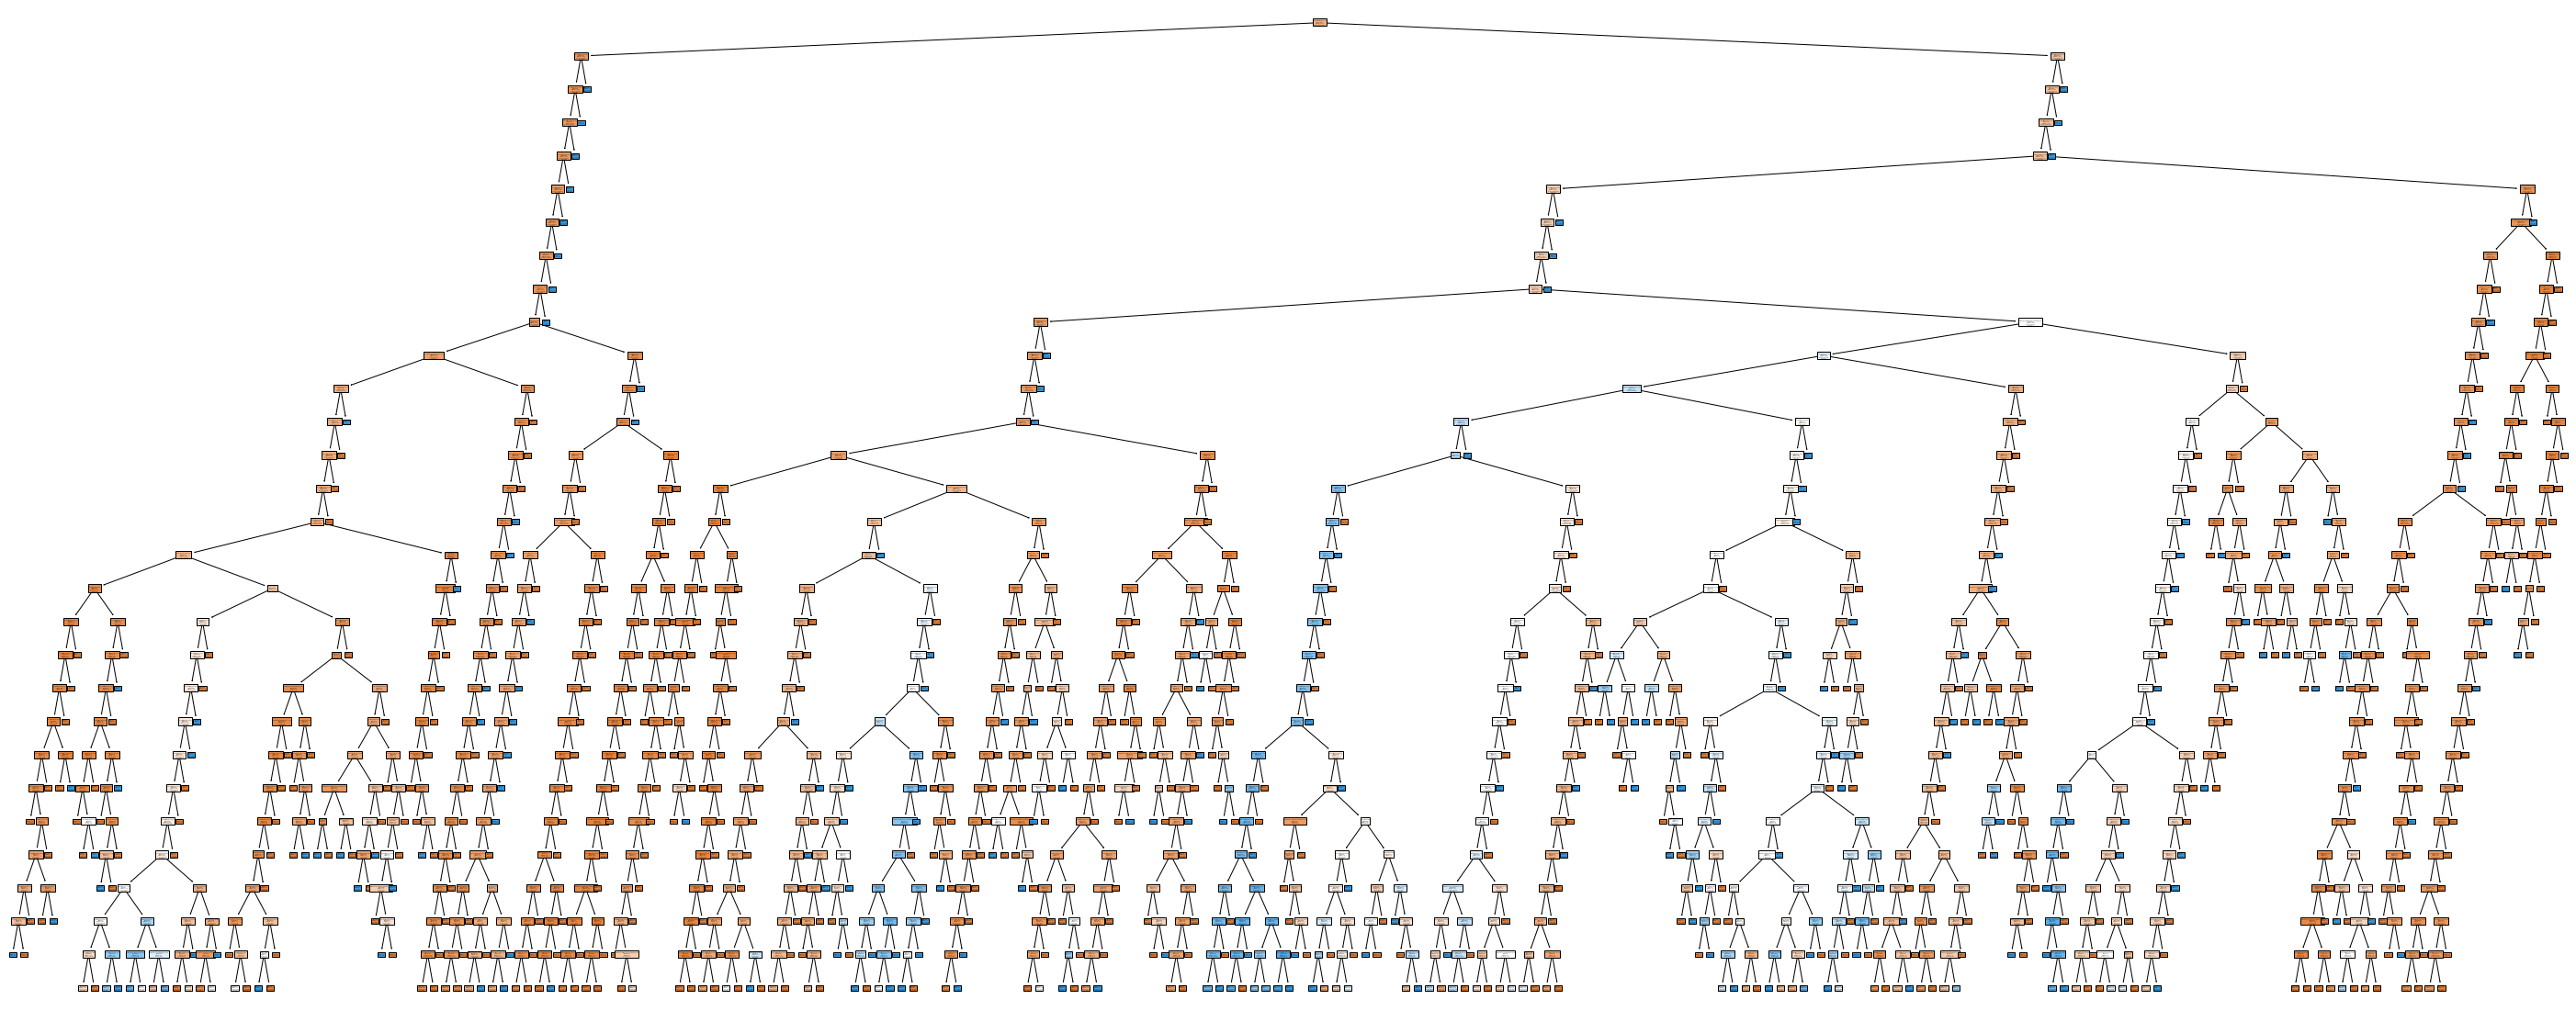

In [208]:
fig, ax = plt.subplots(figsize=(50,20))
tree.plot_tree(rf.estimators_[0], feature_names=features, class_names=["No","Yes"], filled=True, ax=ax);

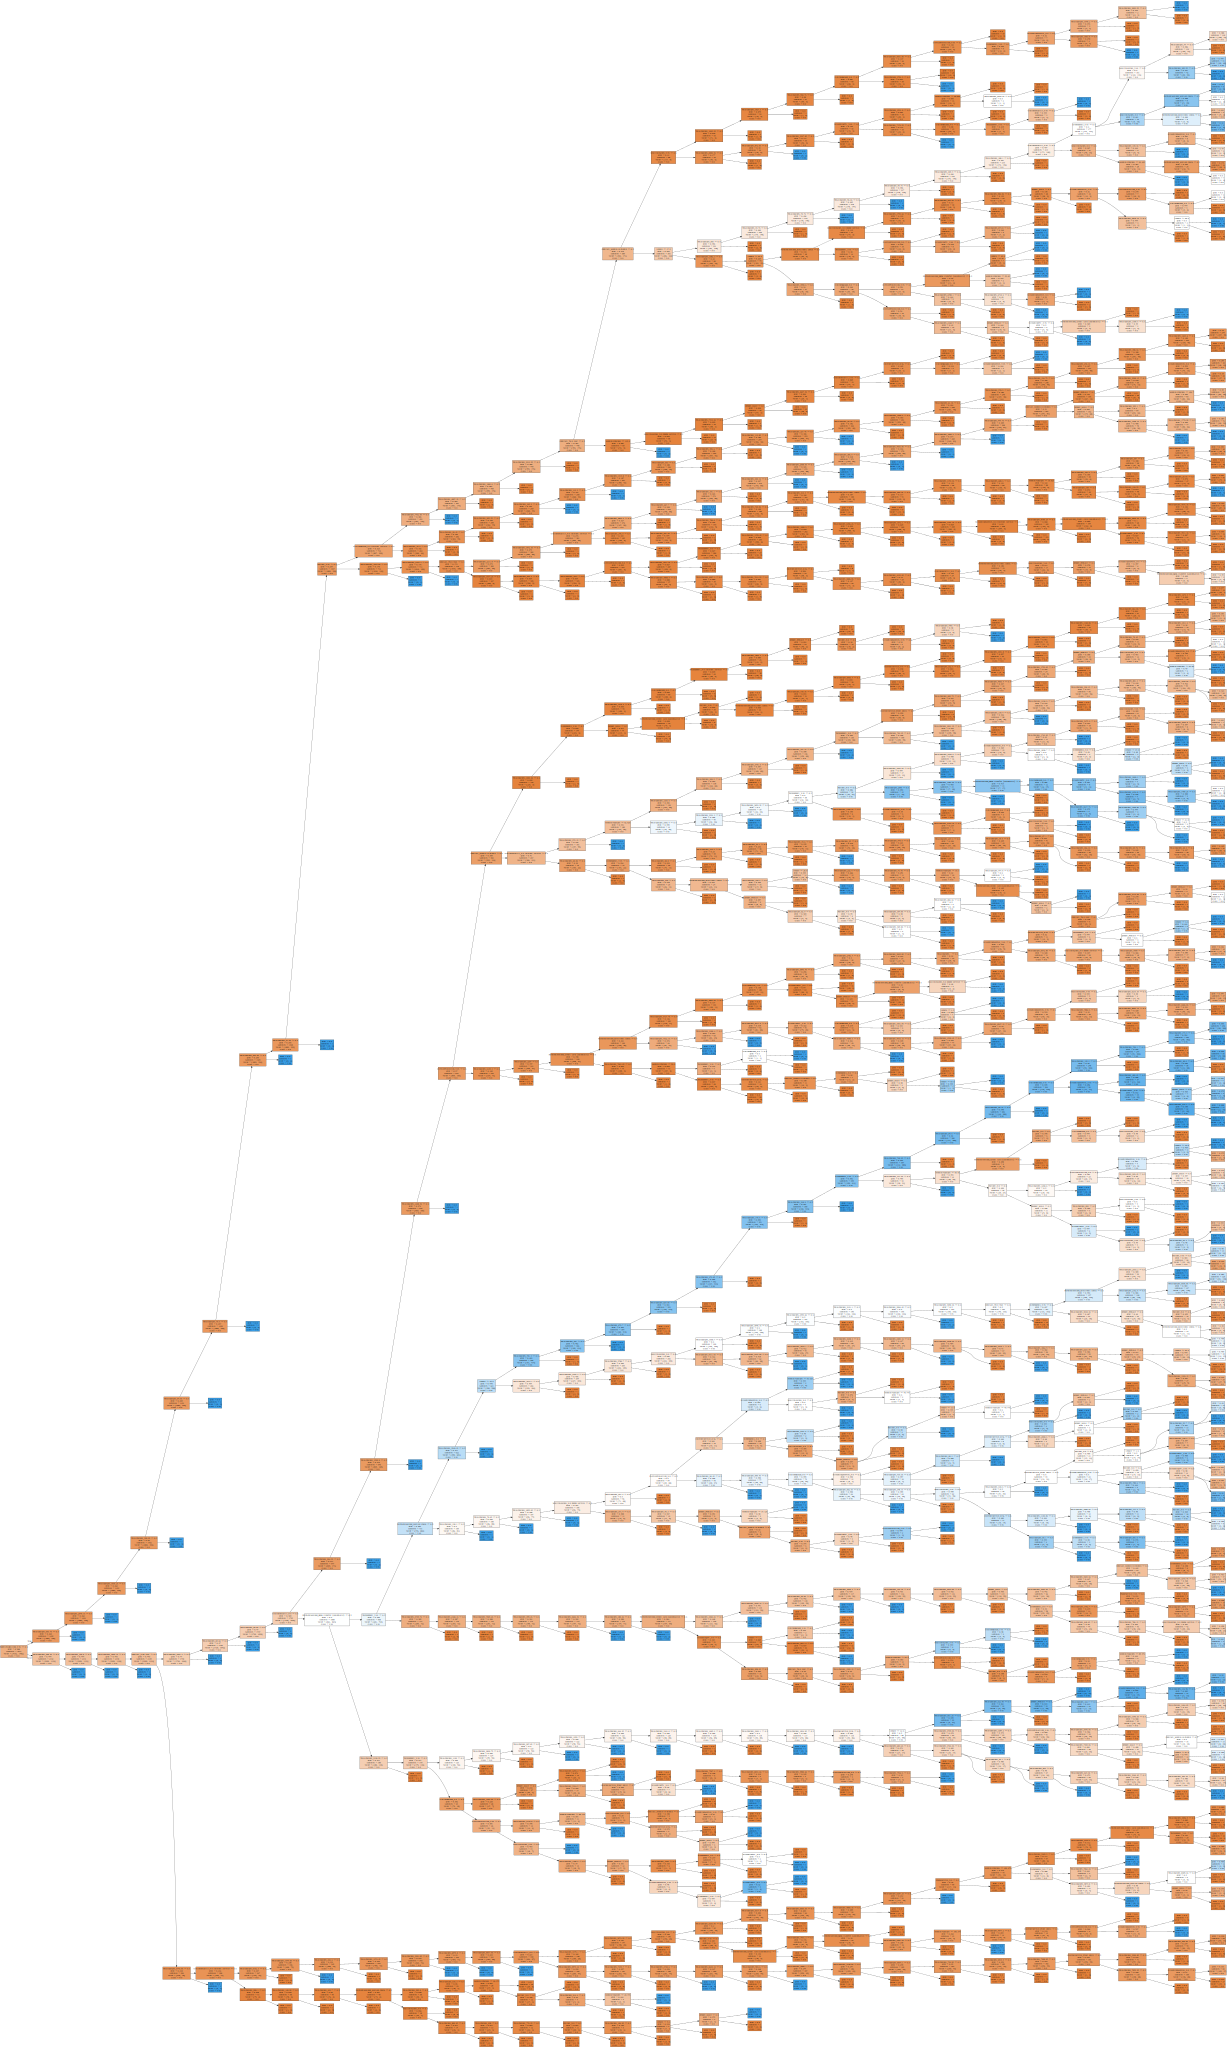

In [209]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(rf.estimators_[0],out_file=None, feature_names=features, 
                           class_names=["No","Yes"], filled=True, rotate=True)
graph = graphviz.Source(dot_data)
graph


Ada Boost


As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better.

In [214]:
from sklearn.ensemble import AdaBoostClassifier


In [215]:
ab = AdaBoostClassifier()
ab = ab.fit(X_train, y_train)

In [216]:
measure_performance(X_test, y_test, ab, show_confussion_matrix=False, show_classification_report=False)


Accuracy:0.799 



This has increase the accuracy of our model

n_estimators = 5 Train = 0.7795970046791061 Test = 0.7797289523578371
n_estimators = 10 Train = 0.7963701933441207 Test = 0.7886038004668235
n_estimators = 15 Train = 0.800319260840231 Test = 0.7910884301206774
n_estimators = 20 Train = 0.80684220090251 Test = 0.7976564260734025
n_estimators = 25 Train = 0.8091052979009877 Test = 0.7994318369868605
n_estimators = 30 Train = 0.8095933191964624 Test = 0.7980110354436005
n_estimators = 35 Train = 0.8101258930946222 Test = 0.8001413709355857
n_estimators = 40 Train = 0.8109691047486225 Test = 0.8006743882200343
n_estimators = 45 Train = 0.8120784113994812 Test = 0.7994319945910251
n_estimators = 50 Train = 0.8132763113831212 Test = 0.8019169394532082
n_estimators = 55 Train = 0.8143856574087946 Test = 0.8029815555846248
n_estimators = 60 Train = 0.8145188328753715 Test = 0.8029820283971183
n_estimators = 65 Train = 0.815450755986596 Test = 0.8019164666407146
n_estimators = 70 Train = 0.816737515083015 Test = 0.8010291551943969
n_estimators

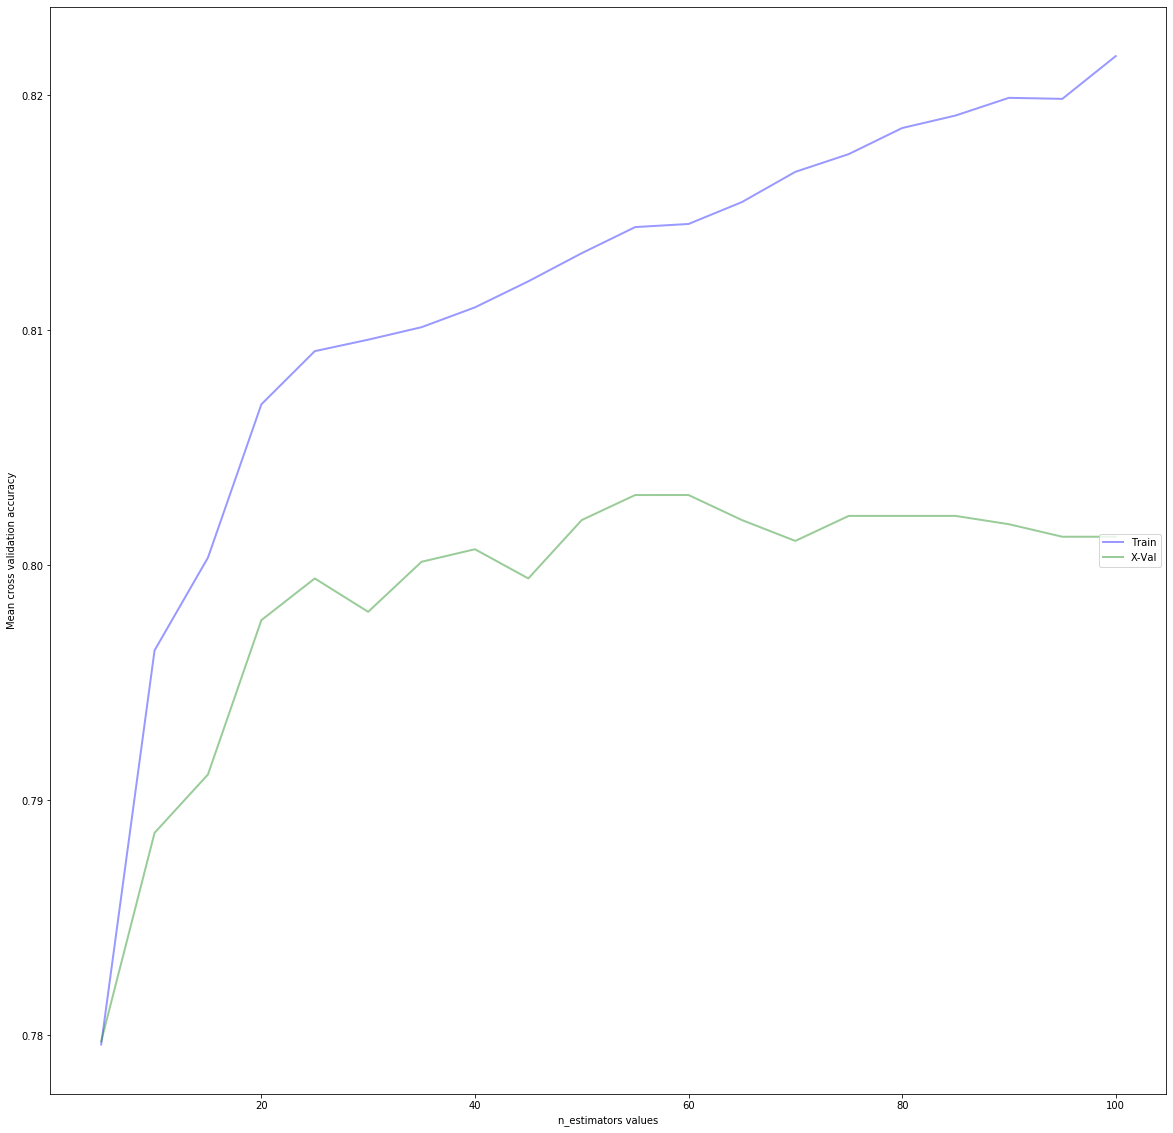

In [217]:
train_scores, test_scores = calc_params(X_train, y_train, ab, nest, 'n_estimators', 5)


In [227]:
ab = AdaBoostClassifier(n_estimators=25)
ab = ab.fit(X_train, y_train)
measure_performance(X_test, y_test, ab, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.803 



Let's use grid search to explore the parameter space more systematically


In [288]:
from sklearn.model_selection import GridSearchCV


In [289]:
ab = AdaBoostClassifier()


In [450]:
parameters = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0, 1.3, 1.5, 1.8, 2.0],
   'n_estimators': range(5, 30, 5),
}

gs = GridSearchCV(ab, parameters , cv=3)


In [451]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=0.6, n_estimators=25,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.6,
                                           0.7, 0.8, 0.9, 1.0, 1.3, 1.5, 1.8,
                                           2.0],
                         'n_estimators': range(5, 30, 5)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [452]:
gs.best_params_, gs.best_score_


({'learning_rate': 0.6, 'n_estimators': 25}, 0.8040468583599574)

In [293]:
ab = AdaBoostClassifier(n_estimators=25, learning_rate=.6)
ab = ab.fit(X_train, y_train)
measure_performance(X_test, y_test, ab, show_confussion_matrix=False, show_classification_report=False)
 

Accuracy:0.790 



Using Gradient Boosted Decision Trees. 

In [453]:
from sklearn.ensemble import GradientBoostingClassifier


In [456]:
gb = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

In [457]:
gb.score(X_test, y_test)

0.8055358410220014